<a href="https://colab.research.google.com/github/kavana-senorita/Heart-Disease-Prediction-/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear classification**

Linear classification is the process of classifying the data into different classes

**Heart Disease Prediction using Machine Learning**








**Problem Statement**

"To develop a Machine Learning model that predicts the presence or absence of heart disease based on medical attributes such as age, gender ,cholestrol levels, blood pressure and other helath indicators, in order to assist healthcare providers in making early and accurate diagnoses.
This problem is generally approached as a classification task,
where the target variable is whether the patient has Heart Disease or not.By predicting the presence or Absence of Heart Disease based on various factors".


*   For Absence of heart disease use 1
*   For Presence of Heart disease use 2




**This datasets contains 270 rows and 14 columns...**

This contains the Information

1. Age -The person's age.

2. Sex -Gender of the individual(0-female,1-male)


3. Chest pain type-The type of chest pain experienced(4,3,2,1)


4. Resting blood pressure -Blood pressure during rest.


5. Cholesterol levels-Total cholesterol in mg/dL.


6. Fasting blood sugar -Whether blood sugar is above a certain level(0 & 1).



7. Resting ECG results – Results of electrocardiogram tests(0, 1, 2).


8. Max heart rate achieved – Maximum heart rate during physical activity.


9. Exercise_induced angina – Whether chest pain is induced by exercise(0 & 1).


10. ST depression – Depression in the ST segment of an ECG after exercise.


11. Slope of the peak exercise ST segment – The slope of the ST segment during peak exercise(2, 1, 3).


12. Number of major vessels colored by fluoroscopy – A measure of major blood vessels(0, 1, 2, 3).

13. Thalassemia – Blood disorder measure (normal-3 , fixed defect - 7, reversible defect- 6).

14. Heart Disease - person having heart disease - 2 ,
      person doesnot having heart disease - 1


  



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
data=pd.read_csv("/content/dataset_heart.csv")
data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


**Exploratory Data Analysis**

Data preprocessing refers to the set of techniques used to clean, transform, and prepare raw data for analysis or modeling. We need to clean the data , Handling the missing values and also removing the irrelevant attributes.It is a crucial step in the data science process to ensure that the data is in a suitable format for analysis or machine learning models.

In [ ]:
data.shape

(270, 14)

In [ ]:
data.size

3780

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [ ]:
data.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
data.columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

**Let us check whether the dataset contains duplicate values or not**

In [ ]:
dup=data.duplicated().value_counts()
dup

,count
False,270


Text(0.5, 1.0, 'Duplicated values')

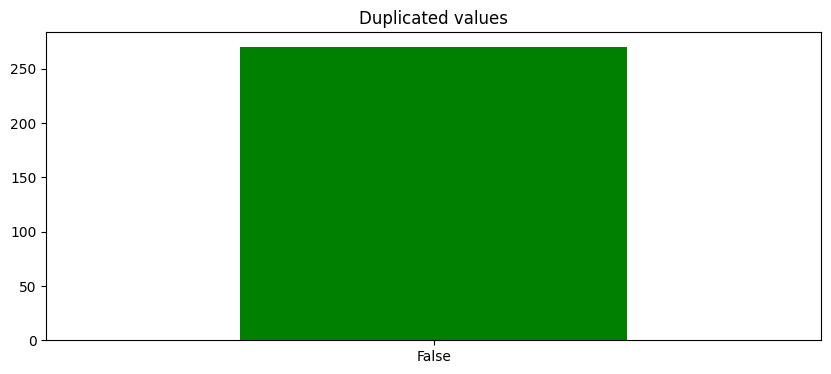

In [ ]:
plt.figure(figsize=(10,4))
dup.plot(kind='bar',color=['g','b'])
plt.xticks(rotation=360)
plt.title('Duplicated values')

In [ ]:
data.isna().sum()/len(data) * 100

,0
age,0.0
sex,0.0
chest pain type,0.0
resting blood pressure,0.0
serum cholestoral,0.0
fasting blood sugar,0.0
resting electrocardiographic results,0.0
max heart rate,0.0
exercise induced angina,0.0
oldpeak,0.0


In [ ]:
data['chest pain type'].unique()

array([4, 3, 2, 1])

In [ ]:
data['resting blood pressure'].unique()

array([130, 115, 124, 128, 120, 110, 140, 150, 135, 142, 134, 112, 132,
       138, 160, 170, 144, 122, 152, 101, 126, 118, 136, 105, 174, 145,
       108, 156, 106, 104,  94, 146, 148, 178, 125, 100, 165, 180, 158,
       200, 117, 192, 123, 129, 102, 155, 172])

In [ ]:
data['resting blood pressure'].nunique()

47

In [ ]:
data['resting blood pressure'].max()

200

In [ ]:
data['fasting blood sugar'].unique()

array([0, 1])

In [ ]:
data['resting electrocardiographic results'].unique()

array([2, 0, 1])

In [ ]:
data['exercise induced angina'].unique()

array([0, 1])

In [ ]:
data['max heart rate'].max()

202

In [ ]:
data['max heart rate'].min()

71

In [ ]:
data['ST segment'].unique()

array([2, 1, 3])

In [ ]:
data['major vessels'].unique()

array([3, 0, 1, 2])

In [ ]:
data['thal'].unique()

array([3, 7, 6])

In [ ]:
data['heart disease'].unique()

array([2, 1])

**Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.**

In [ ]:
fig=px.histogram(data,x='chest pain type',y='heart disease',

                 title = 'Histogram of Chest Pain Type vs Heart Disease',

                 barmode='group')

fig.show()


**In this we will come to know that based on the chest pain type that the person having a heart disease or not**.



In [ ]:
group_cp=data.groupby(['chest pain type','heart disease'])['heart disease'].sum() #2-presence of disease nd 1-Absence of disease
group_cp

chest pain type  heart disease
1                1                 15
                 2                 10
2                1                 35
                 2                 14
3                1                 62
                 2                 34
4                1                 38
                 2                182
Name: heart disease, dtype: int64

**To check the corrleation for heart disease dataset how the data is related by using corrleation matrix**

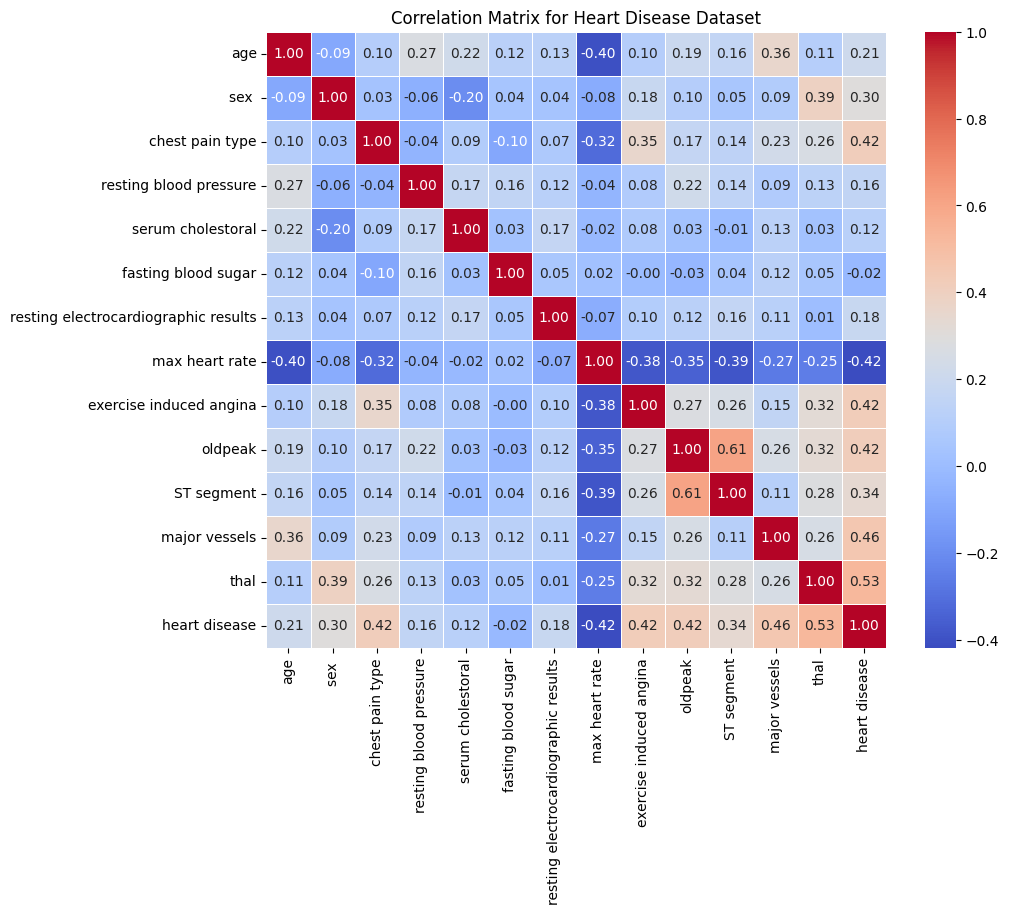

In [ ]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Heart Disease Dataset')
plt.show()

**It calculates the median of resting blood pressure for each chest pain type**

In [ ]:
grouped_cp_median=data. groupby('chest pain type')['resting blood pressure'].median()
grouped_cp_median

,resting blood pressure
chest pain type,
1,142.5
2,128.0
3,130.0
4,130.0


In [ ]:
serum_cholestoral=data['serum cholestoral']
serum_cholestoral

,serum cholestoral
0,322
1,564
2,261
3,263
4,269
...,...
265,199
266,263
267,294
268,192


In [ ]:
serum_avg=data.groupby('serum cholestoral')['heart disease'].median()
serum_avg

,heart disease
serum cholestoral,
126,1.0
141,1.0
149,1.5
160,1.0
164,2.0
...,...
394,1.0
407,2.0
409,2.0


In [ ]:
total_individuals=len(data)
total_individuals

270

In [ ]:
no_heart_disease_count=data[data['heart disease']==1].shape[0]
no_heart_disease_count

150

In [ ]:
no_heart_disease_percentage=(no_heart_disease_count / total_individuals) * 100
no_heart_disease_percentage

55.55555555555556

In [ ]:
heart_disease_count=data[data['heart disease']==2].shape[0]
heart_disease_count

120

In [ ]:
heart_disease_percentage=(heart_disease_count / total_individuals) * 100
heart_disease_percentage

44.44444444444444

In [ ]:
print(f"Percentage of people with heart disease:{heart_disease_percentage:.2f}%")

Percentage of people with heart disease:44.44%


**The train_test_split** function from sklearn.model_selection is used to split a dataset into two subsets: one for training a machine learning model (the training set) and one for evaluating the model's performance

**Training Set:** This is the subset of the data that the model uses to learn patterns and relationships between features and the target variable. It is used to fit or train the model.

**Test Set:** This is the subset of the data that is kept separate from the training process and is used only after the model is trained. It allows you to evaluate how well the model generalizes to new, unseen data.

In This dataset will split the data into 30% for training and 20% for testing, ensuring that the split is reproducible with random_state=42.

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size=0.3,random_state=42)



In [ ]:
train_inputs=train_data.iloc[:,:14]
train_targets=train_data['heart disease']
test_inputs=test_data.iloc[:,:14]
test_targets=test_data['heart disease']

In [ ]:
train_data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
84,57,1,4,110,201,0,0,126,1,1.5,2,0,6,1
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3,1
92,54,1,4,124,266,0,2,109,1,2.2,2,1,7,2
201,58,1,4,125,300,0,2,171,0,0.0,1,2,7,2
126,62,1,4,120,267,0,0,99,1,1.8,2,2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7,2
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3,1
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3,1
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3,1


In [ ]:
test_data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7,2
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7,2
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3,1
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3,1
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,41,0,2,105,198,0,0,168,0,0.0,1,1,3,1
97,58,1,4,100,234,0,0,156,0,0.1,1,1,7,2
200,68,1,3,118,277,0,0,151,0,1.0,1,1,7,1
38,42,1,3,130,180,0,0,150,0,0.0,1,0,3,1


**Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predicted_model=model.predict(test_inputs)
predicted_model

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1])

**To check Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(test_targets,predicted_model)
accuracy_score

1.0

**Calculate Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predicted_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        32

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(test_inputs,test_targets)

DecisionTreeClassifier()

In [ ]:
predict_dt_model=dt_model.predict(test_inputs)
predict_dt_model

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1])

**we need to predict by giving new values to the model let's check how it will predict??**

In [ ]:
data.head(1)

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2


In [ ]:
dt_model.predict([[20,1,3,70,250,1,0,120,0,2.5,1,3,7,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([1])

**Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(test_targets,predict_dt_model)
accuracy_score

1.0

**classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predict_dt_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        32

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



**Random Forests Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(train_inputs,train_targets)

RandomForestClassifier()

In [ ]:
predict_rf_model=rf_model.predict(test_inputs)
predict_rf_model

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1])

**to check Accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(test_targets,predict_rf_model)
accuracy_score

1.0

**Classification Report**

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(test_targets,predict_rf_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        32

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

